<a href="https://colab.research.google.com/github/aurelia0029/Marketing_Start/blob/main/%E3%80%8CLinear_Algebra_hw2%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install imagemagick in order to save gif file.
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono g

In [3]:
# Mount your google drive to save your gif result.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


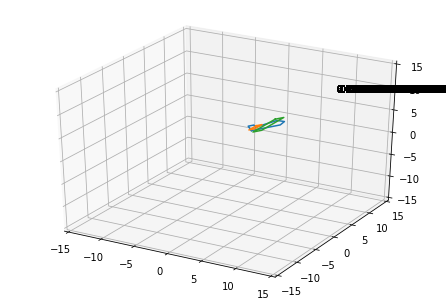

In [5]:
# draw result on colab.
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
import math
from matplotlib.animation import FuncAnimation, PillowWriter 



def set_object(R, T):
    # drawing
    for oo, mat in zip(objs, data):
        n = len(mat[0])
        # rotation 
        mat = np.dot(R, mat) + np.dot(T, np.ones((1,n)))
        # set the object    
        oo.set_data(mat[0], mat[1])
        oo.set_3d_properties(mat[2])
    return objs

def roll(i):
    phi = 2*i*math.pi/N
    # define the rotation matrix
    R = np.array([[1,             0,             0],
                  [0, math.cos(phi), -math.sin(phi)], 
                  [0, math.sin(phi), math.cos(phi)]]);
    
    m = len(data)
    T = np.zeros((m,1))     # no translation
   # return set_object(R, T)
    return R

def yaw(i):
    phi = -2*math.pi*i/N
    # define the rotation matrix
    R = np.array([[math.cos(phi), -math.sin(phi), 0], 
                  [math.sin(phi),  math.cos(phi), 0], 
                  [0,              0,             1]]);
    
    m = len(data)
    T = np.zeros((m,1))     # no translation
    return R

def pitch(i):
    phi = 2*math.pi*xdata[int(i+N/4)%N]/r/12
    # define the rotation matrix
    R = np.array([[ math.cos(phi), 0, -math.sin(phi)], 
                  [0,              1,             0],
                  [math.sin(phi), 0, math.cos(phi)]]);
    
    m = len(data)
    T = np.zeros((m,1))     # no translation
    ax.text(10, 10, 10, str(phi))
    return R


def myMovie_basic(i):
    T = np.array([[xdata[i]], [ydata[i]], [xdata[i]]])
    R = np.eye(3)
    return set_object(R, T)


def myMovie(i):
    T = np.array([[xdata[i]], [ydata[i]], [xdata[i]]])
    # yaw
    # slip a circle into N equal angles
    R = yaw(i)

    # add pitch
    R = np.dot(R, pitch(i))
    
    # add roll
    R = np.dot(R, roll(i))
    return set_object(R, T)


# -------------- main program starts here ----------------#
N = 100
fig = plt.gcf()
ax = Axes3D(fig, xlim=(-15, 15), ylim=(-15, 15), zlim=(-15, 15))


# data matrix
M1 = np.array([[-3, -3, -2, -2, 2, 3, 2, -3], 
                [0, 0, 0, 0, 0, 0, 0, 0], 
                [-.5, .5, .5, 0, .5, 0, -.5, -.5]])
M2 = np.array([[-2.5, -2.5, -1.5, -1.5, -2.5], 
                [1, -1, -1, 1, 1], 
                [0, 0, 0, 0, 0]])
M3 = np.array([[-.5, -.5, 1, 1, -.5], 
                [3, -3, -3, 3, 3],
                [0, 0, 0, 0, 0]])
data = [M1, M2, M3]

# create 3D objects list
O1, = ax.plot3D(M1[0], M1[1], M1[2])
O2, = ax.plot3D(M2[0], M2[1], M2[2])
O3, = ax.plot3D(M3[0], M3[1], M3[2])
objs = [O1, O2, O3]

# trajectory data
t = np.arange(0,1,0.01)
r = 10
xdata = r*np.sin(2*math.pi*t)
ydata = r*np.cos(2*math.pi*t)

# basic rotations
# ani = FuncAnimation(fig, roll, frames=N, interval=10)
# ani = FuncAnimation(fig, yaw, frames=N, interval=10)
#ani = FuncAnimation(fig, pitch, frames=N, interval=1000)
ani = FuncAnimation(fig, myMovie, frames=len(xdata), interval=100)

# ani.save('/content/drive/My Drive/your_file_name', writer='imagemagick', fps=30)
ani.save('/content/drive/My Drive/A2.gif', writer='imagemagick', fps=30)

# ---------------- for google colab user ----------------#
# If you didn't use colab, you can delete below 2 lines of code.
from IPython.display import HTML
HTML(ani.to_html5_video())
# ---------------- for google colab user ----------------#
